In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data cleaning

In [66]:
df=pd.read_csv("/content/realistic_car_data.csv")

In [67]:
df.head()

,Brand,Model,Year,Odometer Reading (km),Fuel Type,Transmission Type,Color,Number of Owners,Service History,Location,Previous Accidents,Engine Capacity (L),Car Type,Insurance Type,Price (INR)
0,Hyundai,Elantra,2007,53266,Petrol,Automatic,Black,3,True,Delhi,False,4.3,Coupe,NaN,462010.10
1,Toyota,Corolla,2005,126939,Electric,Automatic,Grey,2,False,Mumbai,True,4.9,Sedan,NaN,180959.15
2,Mercedes,S-Class,2011,176820,Electric,Manual,White,2,True,Delhi,True,2.8,Hatchback,Comprehensive,9293477.00
3,Tata,Altroz,2003,106196,Diesel,Manual,Black,2,False,Mumbai,True,1.1,Hatchback,Comprehensive,50000.00
4,Honda,Civic,2024,189674,Electric,Manual,Blue,1,False,Mumbai,False,2.2,SUV,NaN,700000.00


In [68]:
df.shape

(10000, 15)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  10000 non-null  object 
 1   Model                  10000 non-null  object 
 2   Year                   10000 non-null  int64  
 3   Odometer Reading (km)  10000 non-null  int64  
 4   Fuel Type              10000 non-null  object 
 5   Transmission Type      10000 non-null  object 
 6   Color                  10000 non-null  object 
 7   Number of Owners       10000 non-null  int64  
 8   Service History        10000 non-null  bool   
 9   Location               10000 non-null  object 
 10  Previous Accidents     10000 non-null  bool   
 11  Engine Capacity (L)    10000 non-null  float64
 12  Car Type               10000 non-null  object 
 13  Insurance Type         6683 non-null   object 
 14  Price (INR)            10000 non-null  float64
dtypes: 

In [70]:
df.isnull().sum()

,0
Brand,0
Model,0
Year,0
Odometer Reading (km),0
Fuel Type,0
Transmission Type,0
Color,0
Number of Owners,0
Service History,0
Location,0


In [71]:
#convert boolean to categorical(True=yes & False=No)
bool_cols=df.select_dtypes(include="bool").columns

for col in bool_cols:
  df[col]=df[col].apply(lambda x: "Yes" if x==True else "No")


In [72]:
df.head()


,Brand,Model,Year,Odometer Reading (km),Fuel Type,Transmission Type,Color,Number of Owners,Service History,Location,Previous Accidents,Engine Capacity (L),Car Type,Insurance Type,Price (INR)
0,Hyundai,Elantra,2007,53266,Petrol,Automatic,Black,3,Yes,Delhi,No,4.3,Coupe,NaN,462010.10
1,Toyota,Corolla,2005,126939,Electric,Automatic,Grey,2,No,Mumbai,Yes,4.9,Sedan,NaN,180959.15
2,Mercedes,S-Class,2011,176820,Electric,Manual,White,2,Yes,Delhi,Yes,2.8,Hatchback,Comprehensive,9293477.00
3,Tata,Altroz,2003,106196,Diesel,Manual,Black,2,No,Mumbai,Yes,1.1,Hatchback,Comprehensive,50000.00
4,Honda,Civic,2024,189674,Electric,Manual,Blue,1,No,Mumbai,No,2.2,SUV,NaN,700000.00


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  10000 non-null  object 
 1   Model                  10000 non-null  object 
 2   Year                   10000 non-null  int64  
 3   Odometer Reading (km)  10000 non-null  int64  
 4   Fuel Type              10000 non-null  object 
 5   Transmission Type      10000 non-null  object 
 6   Color                  10000 non-null  object 
 7   Number of Owners       10000 non-null  int64  
 8   Service History        10000 non-null  object 
 9   Location               10000 non-null  object 
 10  Previous Accidents     10000 non-null  object 
 11  Engine Capacity (L)    10000 non-null  float64
 12  Car Type               10000 non-null  object 
 13  Insurance Type         6683 non-null   object 
 14  Price (INR)            10000 non-null  float64
dtypes: 

In [74]:
# Handle missing values in 'Insurance Type' column
df['Insurance Type'].fillna(df['Insurance Type'].mode()[0], inplace=True)


<ipython-input-74-71217ed1e96d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Insurance Type'].fillna(df['Insurance Type'].mode()[0], inplace=True)


In [75]:
df.head()

,Brand,Model,Year,Odometer Reading (km),Fuel Type,Transmission Type,Color,Number of Owners,Service History,Location,Previous Accidents,Engine Capacity (L),Car Type,Insurance Type,Price (INR)
0,Hyundai,Elantra,2007,53266,Petrol,Automatic,Black,3,Yes,Delhi,No,4.3,Coupe,Comprehensive,462010.10
1,Toyota,Corolla,2005,126939,Electric,Automatic,Grey,2,No,Mumbai,Yes,4.9,Sedan,Comprehensive,180959.15
2,Mercedes,S-Class,2011,176820,Electric,Manual,White,2,Yes,Delhi,Yes,2.8,Hatchback,Comprehensive,9293477.00
3,Tata,Altroz,2003,106196,Diesel,Manual,Black,2,No,Mumbai,Yes,1.1,Hatchback,Comprehensive,50000.00
4,Honda,Civic,2024,189674,Electric,Manual,Blue,1,No,Mumbai,No,2.2,SUV,Comprehensive,700000.00


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  10000 non-null  object 
 1   Model                  10000 non-null  object 
 2   Year                   10000 non-null  int64  
 3   Odometer Reading (km)  10000 non-null  int64  
 4   Fuel Type              10000 non-null  object 
 5   Transmission Type      10000 non-null  object 
 6   Color                  10000 non-null  object 
 7   Number of Owners       10000 non-null  int64  
 8   Service History        10000 non-null  object 
 9   Location               10000 non-null  object 
 10  Previous Accidents     10000 non-null  object 
 11  Engine Capacity (L)    10000 non-null  float64
 12  Car Type               10000 non-null  object 
 13  Insurance Type         10000 non-null  object 
 14  Price (INR)            10000 non-null  float64
dtypes: 

In [77]:
df.isnull().sum()

,0
Brand,0
Model,0
Year,0
Odometer Reading (km),0
Fuel Type,0
Transmission Type,0
Color,0
Number of Owners,0
Service History,0
Location,0


In [78]:
#converting the "Number of Owners" column into categorical
df["Number of Owners"]=df["Number of Owners"].apply(lambda x: str(x)+" owner")

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  10000 non-null  object 
 1   Model                  10000 non-null  object 
 2   Year                   10000 non-null  int64  
 3   Odometer Reading (km)  10000 non-null  int64  
 4   Fuel Type              10000 non-null  object 
 5   Transmission Type      10000 non-null  object 
 6   Color                  10000 non-null  object 
 7   Number of Owners       10000 non-null  object 
 8   Service History        10000 non-null  object 
 9   Location               10000 non-null  object 
 10  Previous Accidents     10000 non-null  object 
 11  Engine Capacity (L)    10000 non-null  float64
 12  Car Type               10000 non-null  object 
 13  Insurance Type         10000 non-null  object 
 14  Price (INR)            10000 non-null  float64
dtypes: 

In [80]:
#checking the duplicates
df[df.duplicated()==True]

,Brand,Model,Year,Odometer Reading (km),Fuel Type,Transmission Type,Color,Number of Owners,Service History,Location,Previous Accidents,Engine Capacity (L),Car Type,Insurance Type,Price (INR)


In [81]:
df.to_csv("cleaned_car_dataset.csv",index=False)

#EDA & STATISTICAL ANALYSIS

In [82]:
df=pd.read_csv("/content/cleaned_car_dataset.csv")

In [83]:
#summary statistics #descriptive statistics
df.describe()

,Year,Odometer Reading (km),Engine Capacity (L),Price (INR)
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,2012.094200,102439.373300,3.007970,2.129882e+06
std,7.169914,56336.680587,1.152593,2.597531e+06
min,2000.000000,5043.000000,1.000000,5.000000e+04
25%,2006.000000,53823.500000,2.000000,1.853432e+05
50%,2012.000000,102451.000000,3.000000,7.419287e+05
75%,2018.000000,152218.500000,4.000000,3.765107e+06
max,2024.000000,199999.000000,5.000000,1.000000e+07


**Descriptive Statistics Overview**

**1. Year:**

Mean: 2012.09

The average car in the dataset was manufactured around 2012.

Min: 2000

The oldest car in the dataset is from the year 2000.

Max: 2024

The most recent car in the dataset is from 2024.

**2. Odometer Reading (km):**

Mean: 102,439.37 km

On average, the cars have been driven for about 102,439 km.

Min: 5,043 km

The least driven car in the dataset has been driven for only 5,043 km.

Max: 199,999 km

The most driven car has been used for nearly 200,000 km.

Std: 56,336.68 km

There's quite a bit of variation in the number of kilometers driven, with some cars having much higher readings than others.



**3. Engine Capacity (L):**

Mean: 3.01 liters

The average engine capacity of the cars is around 3 liters.

Min: 1 liter

The smallest engine capacity in the dataset is 1 liter.

Max: 5 liters

The largest engine capacity is 5 liters.

Std: 1.15 liters

There's a moderate spread in engine capacities across the cars.

**4. Price (INR):**

Mean: ₹2,129,882

The average price of a car in the dataset is around ₹2.13 million.

Min: ₹50,000

The least expensive car in the dataset costs ₹50,000.

Max: ₹10,000,000

The most expensive car in the dataset is priced at ₹10 million.

Std: ₹2,597,531

The standard deviation is quite high, indicating a large range of car prices in the dataset.

In [84]:
df.head()

,Brand,Model,Year,Odometer Reading (km),Fuel Type,Transmission Type,Color,Number of Owners,Service History,Location,Previous Accidents,Engine Capacity (L),Car Type,Insurance Type,Price (INR)
0,Hyundai,Elantra,2007,53266,Petrol,Automatic,Black,3 owner,Yes,Delhi,No,4.3,Coupe,Comprehensive,462010.10
1,Toyota,Corolla,2005,126939,Electric,Automatic,Grey,2 owner,No,Mumbai,Yes,4.9,Sedan,Comprehensive,180959.15
2,Mercedes,S-Class,2011,176820,Electric,Manual,White,2 owner,Yes,Delhi,Yes,2.8,Hatchback,Comprehensive,9293477.00
3,Tata,Altroz,2003,106196,Diesel,Manual,Black,2 owner,No,Mumbai,Yes,1.1,Hatchback,Comprehensive,50000.00
4,Honda,Civic,2024,189674,Electric,Manual,Blue,1 owner,No,Mumbai,No,2.2,SUV,Comprehensive,700000.00


**univariate Analaysis**

numerical features

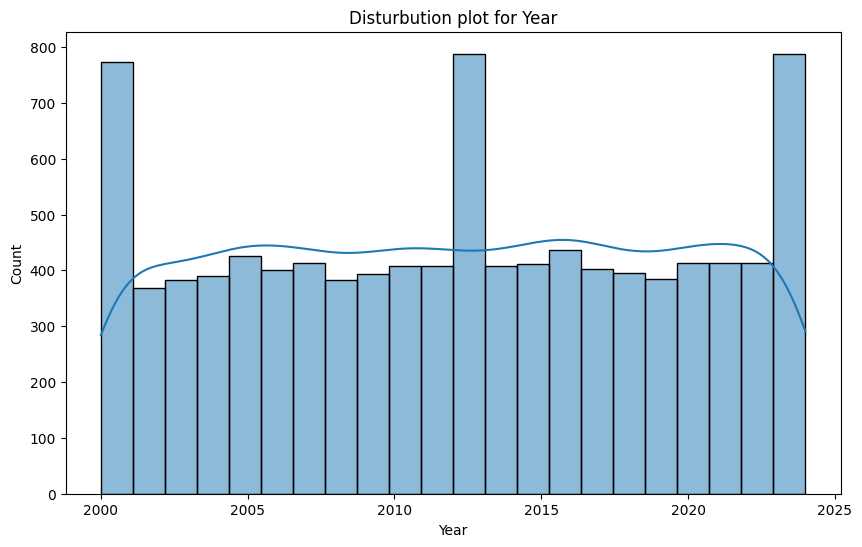

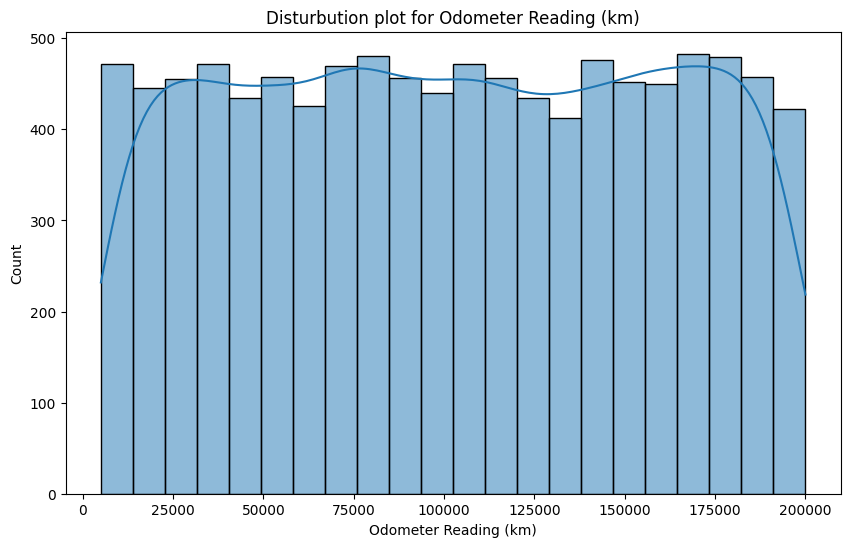

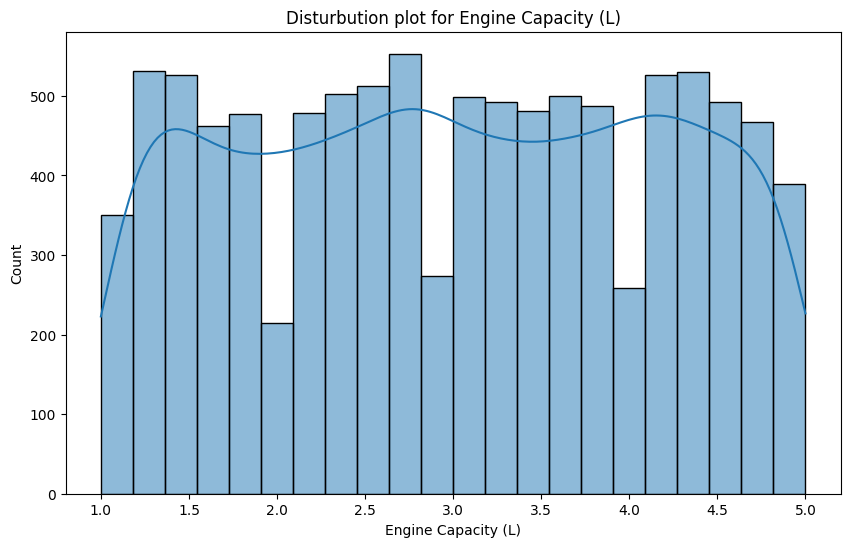

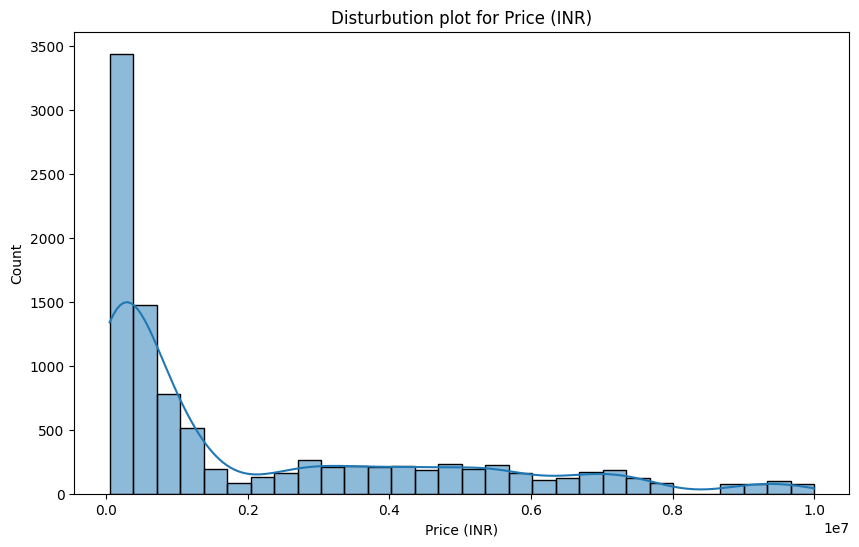

In [85]:
numeric_cols=df.select_dtypes(include="number")

for col in numeric_cols:
  plt.figure(figsize=(10,6))
  plt.title(f"Disturbution plot for {col}")
  sns.histplot(df[col],kde=True)
  plt.show()

the disturbution plot of Price (target) is highly right skewed ,to reduce these skewness we going to "log transform"

In [86]:
df["Log Price"]=np.log1p(df["Price (INR)"]) #log(1+x)


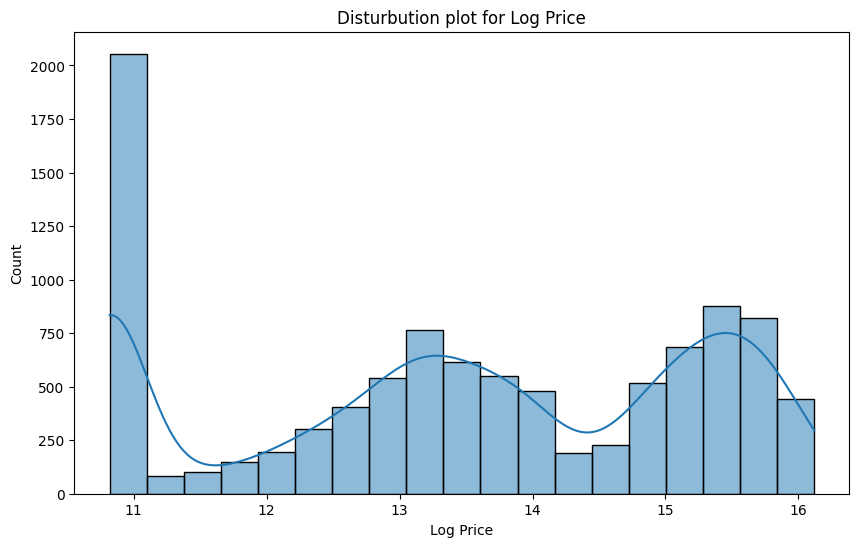

In [87]:
plt.figure(figsize=(10,6))
plt.title(f"Disturbution plot for Log Price")
sns.histplot(df["Log Price"],kde=True)
plt.show()

for categorical features

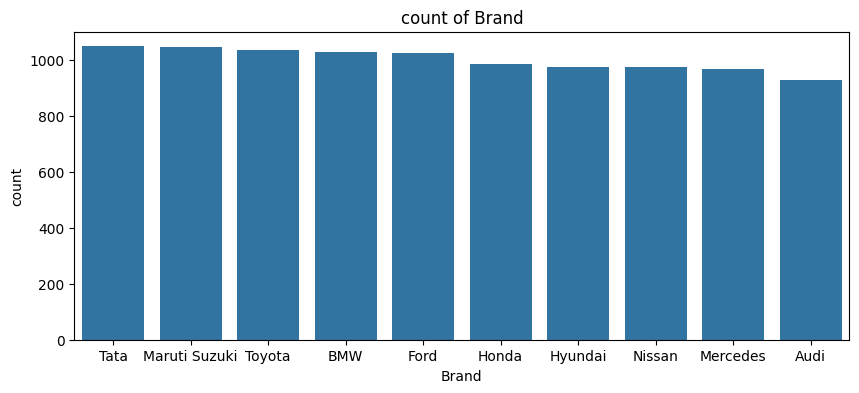

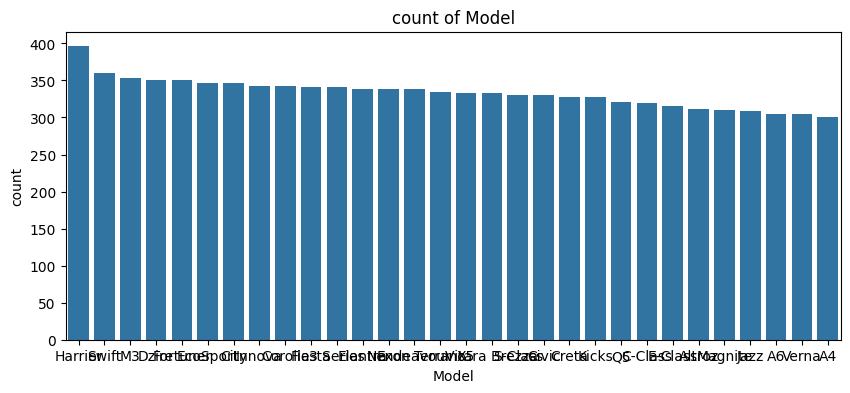

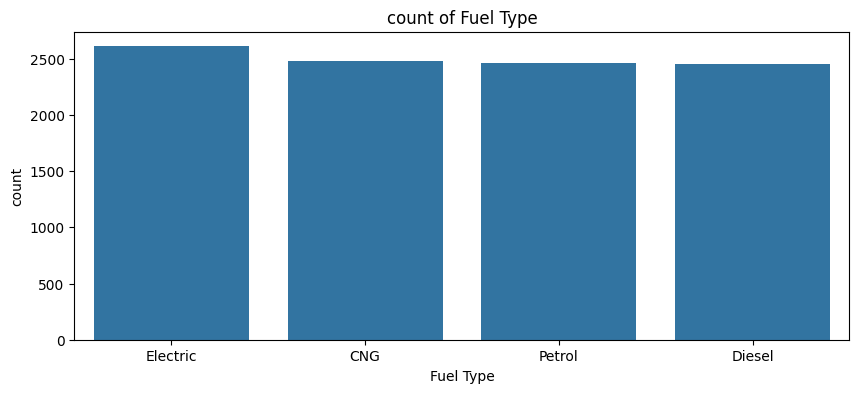

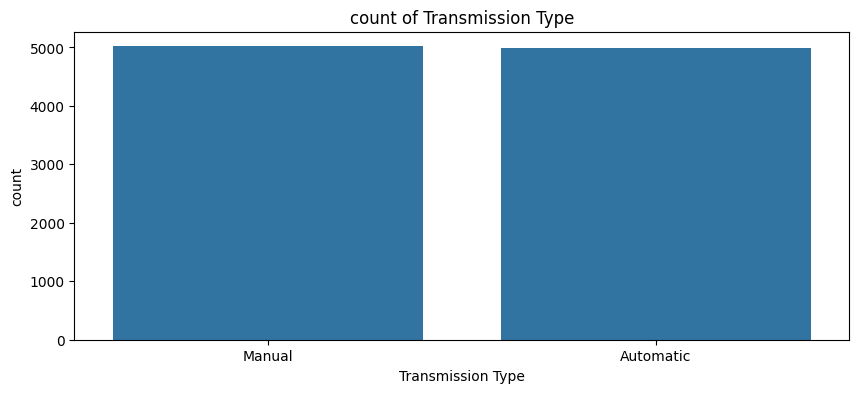

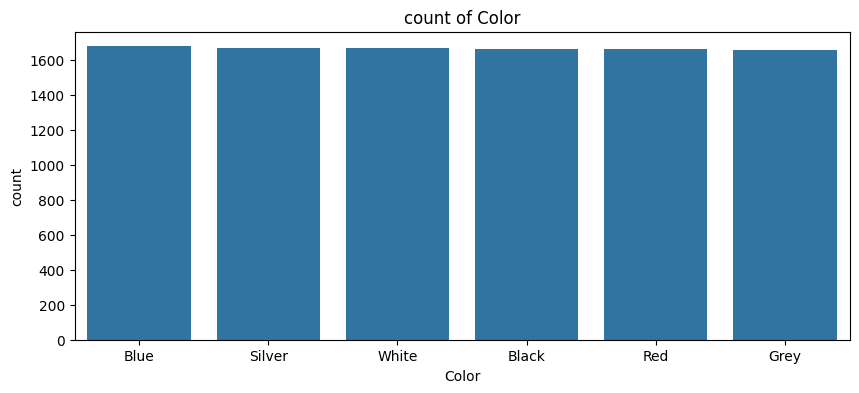

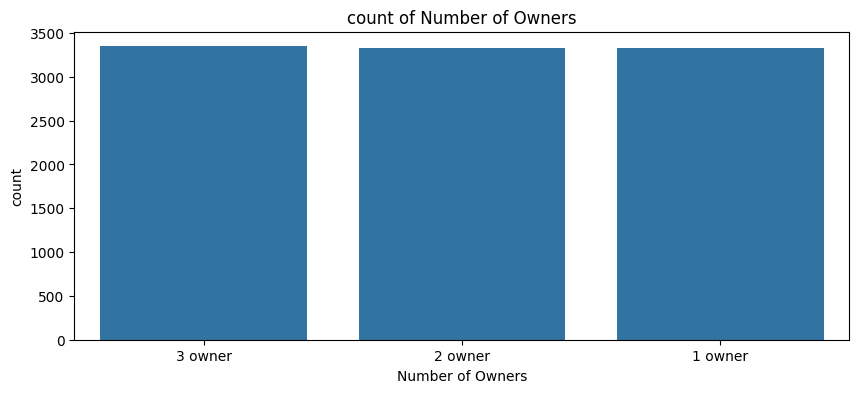

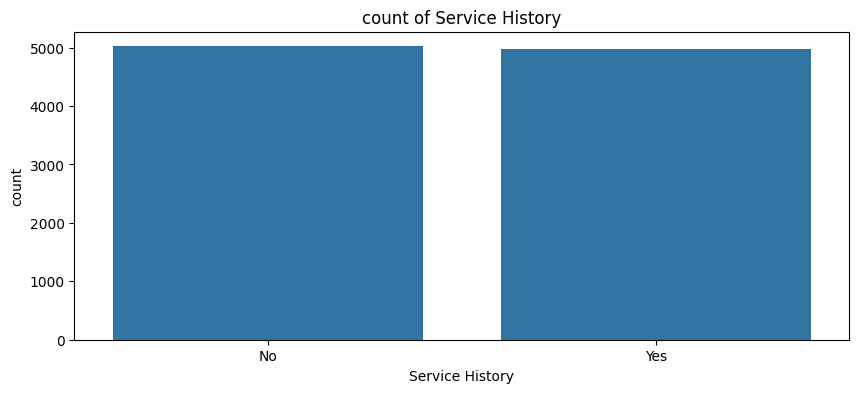

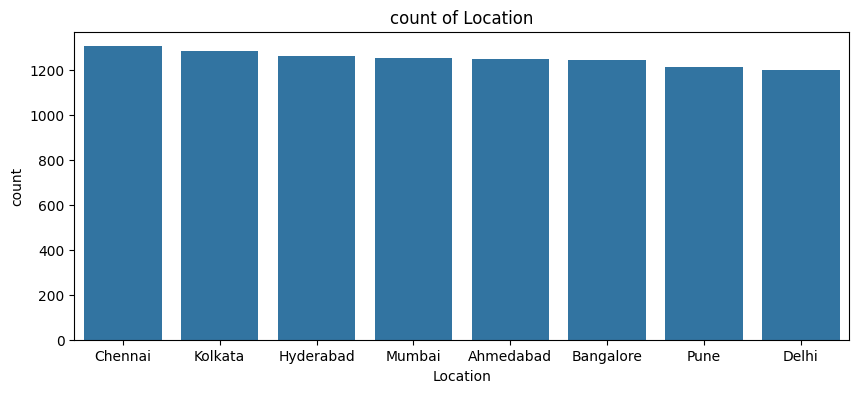

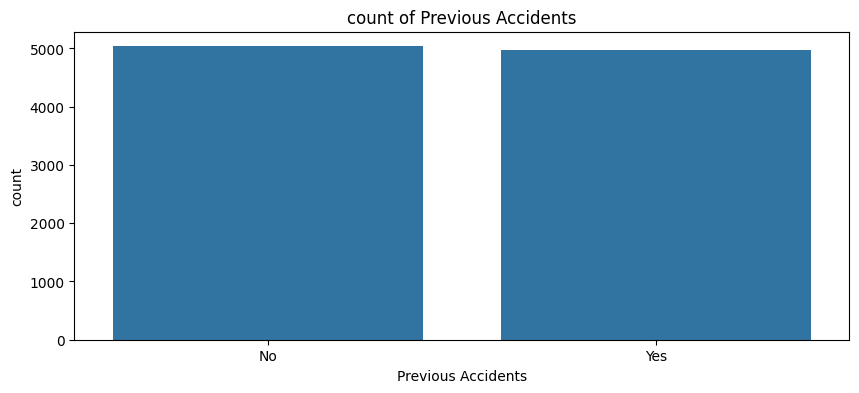

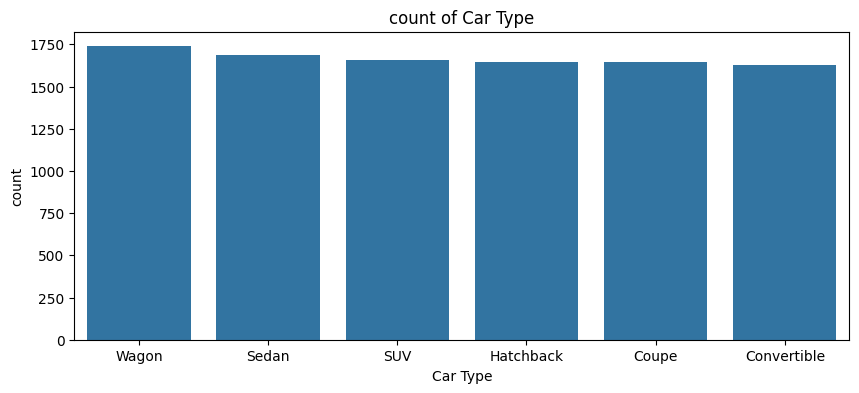

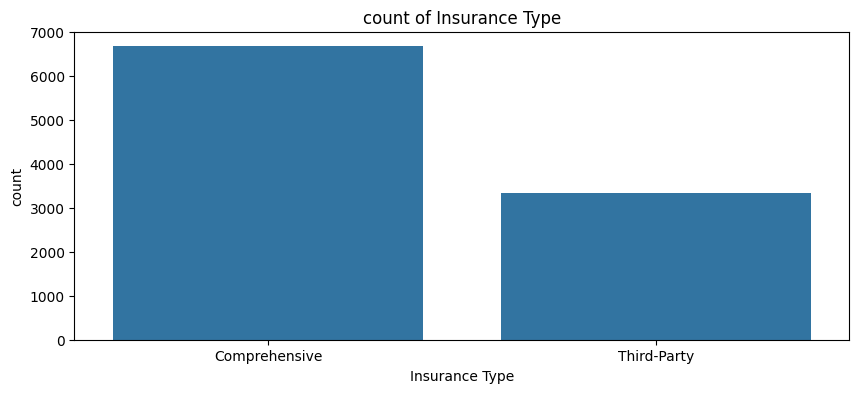

In [88]:
categorical_cols=df.select_dtypes(include=["object","bool"])

for col in categorical_cols:
  plt.figure(figsize=(10,4))
  plt.title(f"count of {col}")
  sns.countplot(x=df[col],order=df[col].value_counts().index)
  plt.show()

**Bivariant Analysis**

price vs numerical features

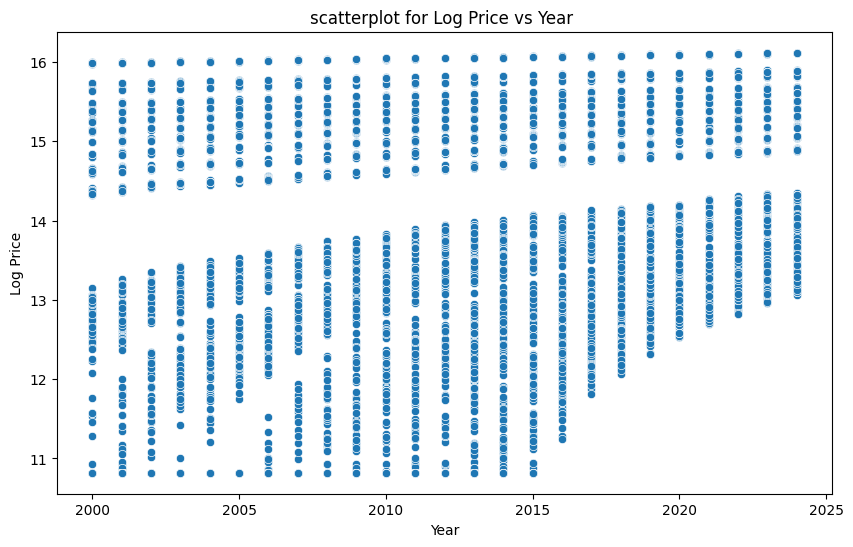

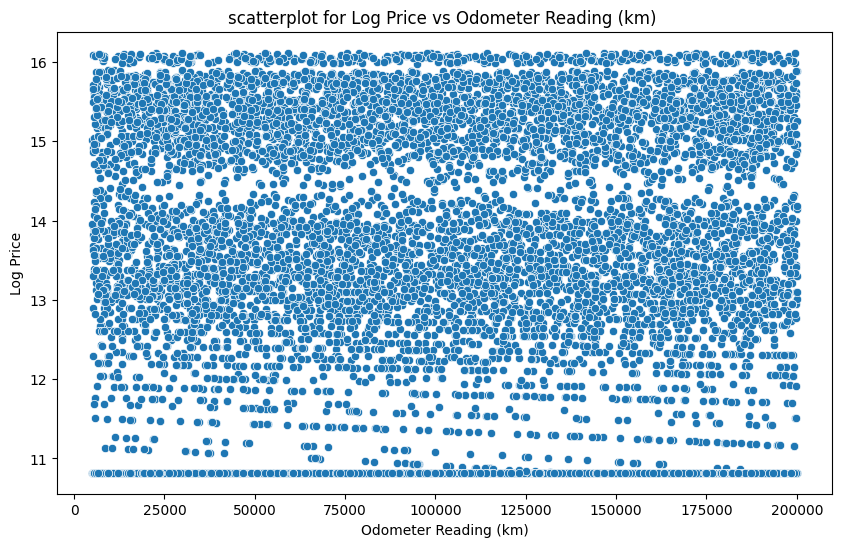

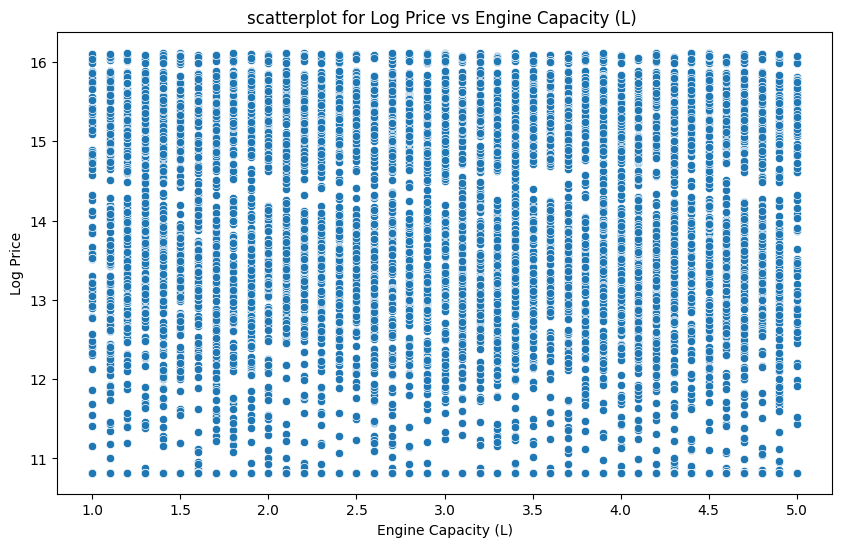

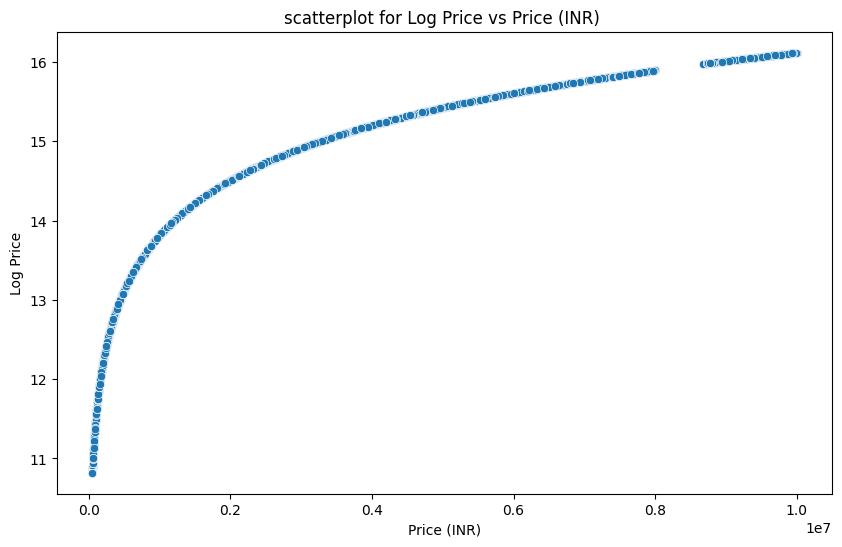

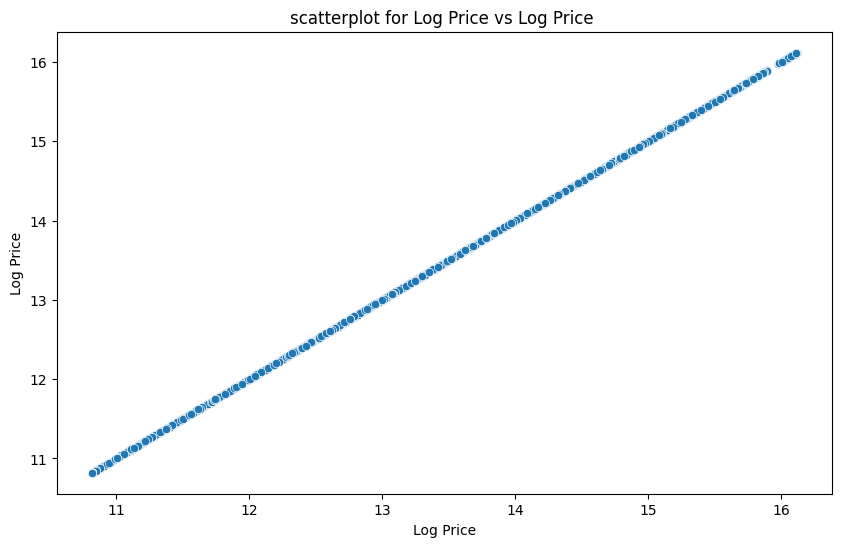

In [89]:
numeric_cols=df.select_dtypes(include="number")
for col in numeric_cols:
  plt.figure(figsize=(10,6))
  plt.title(f"scatterplot for Log Price vs {col} ")
  sns.scatterplot(x=df[col],y=df["Log Price"])
  plt.xlabel(f"{col}")
  plt.ylabel("Log Price")
  plt.show()

from above,we observe that target have only non-linear relationships with other numerical variables

so,use non-linear model only.


incase,if you want to do linear model ,try log transform,square or cube transform , PolynomialFeatures-->fit_transform()

price vs catergorical features

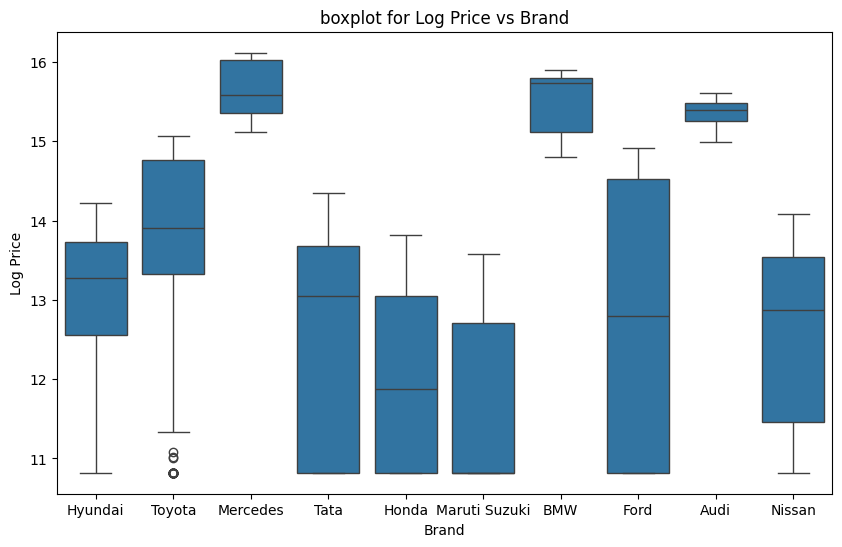

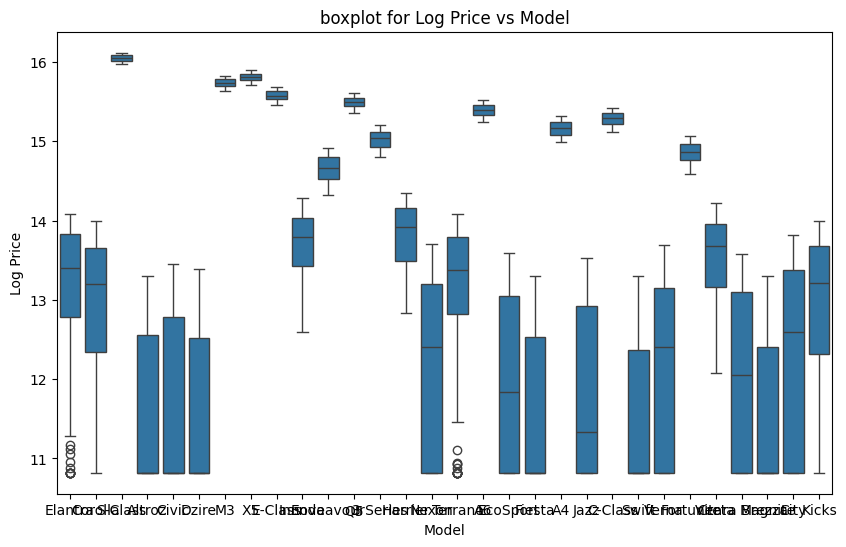

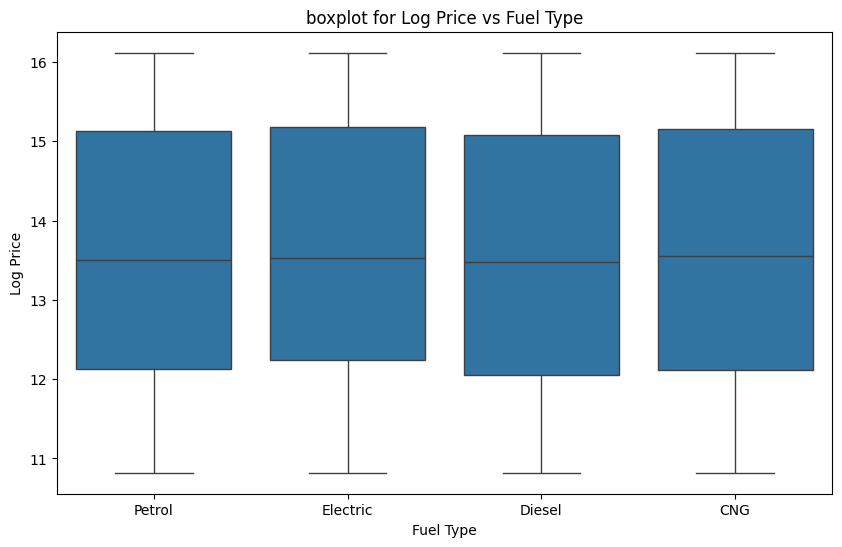

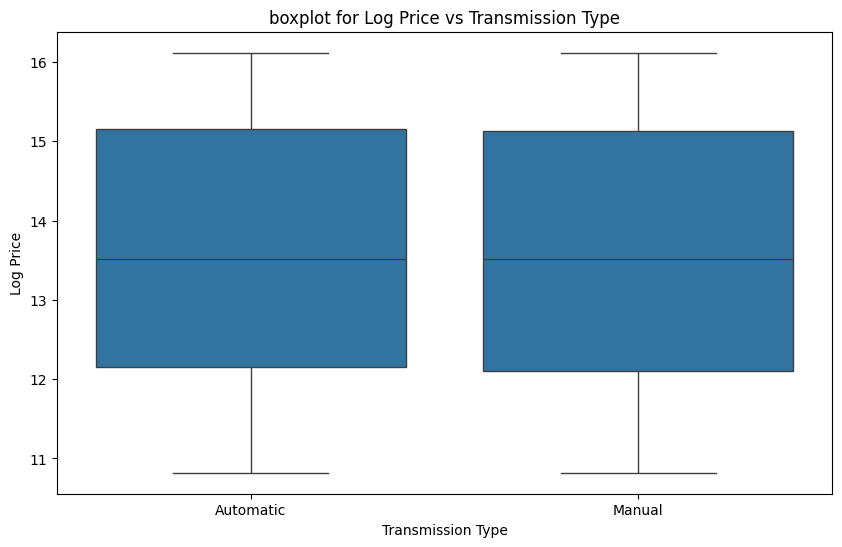

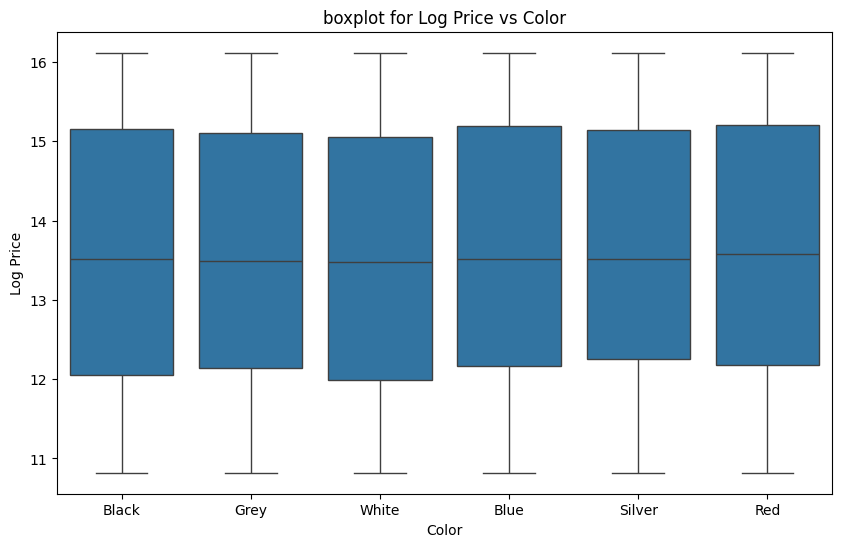

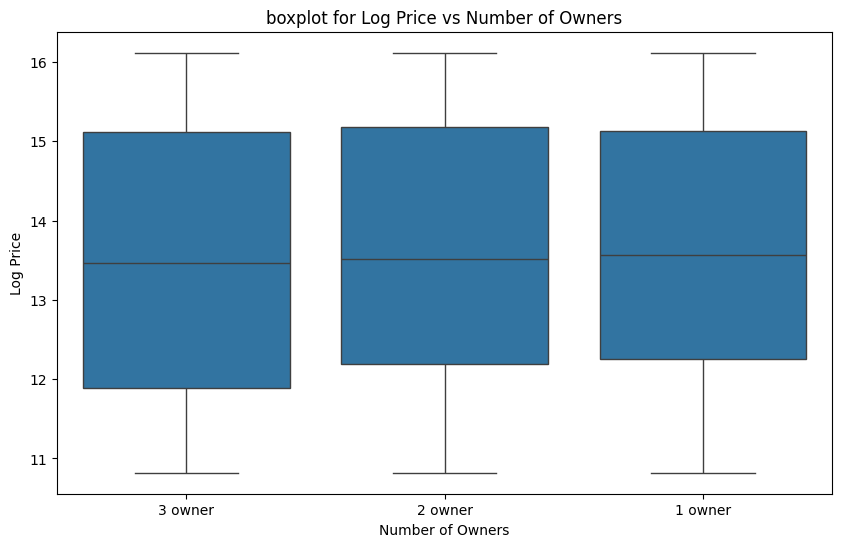

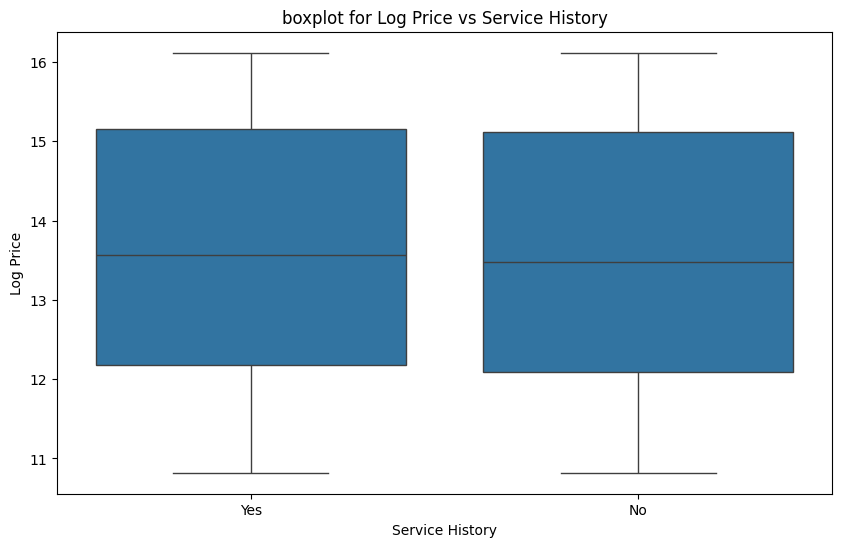

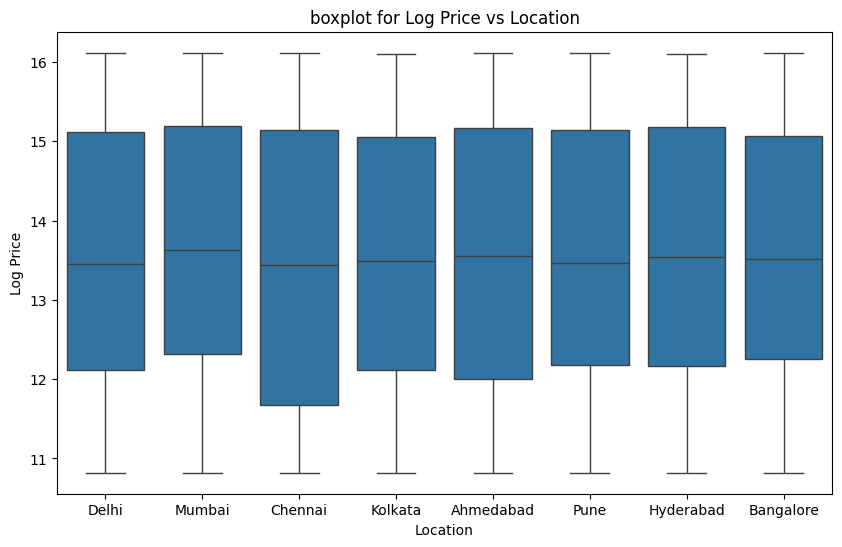

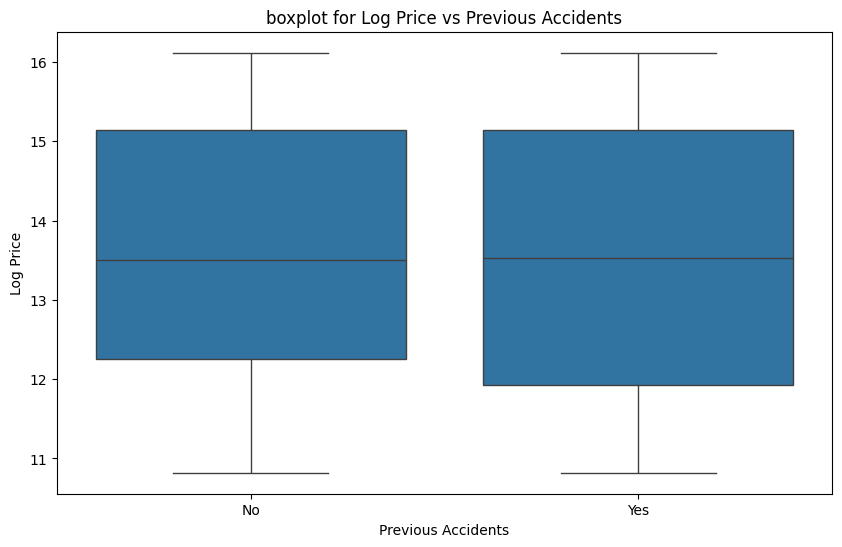

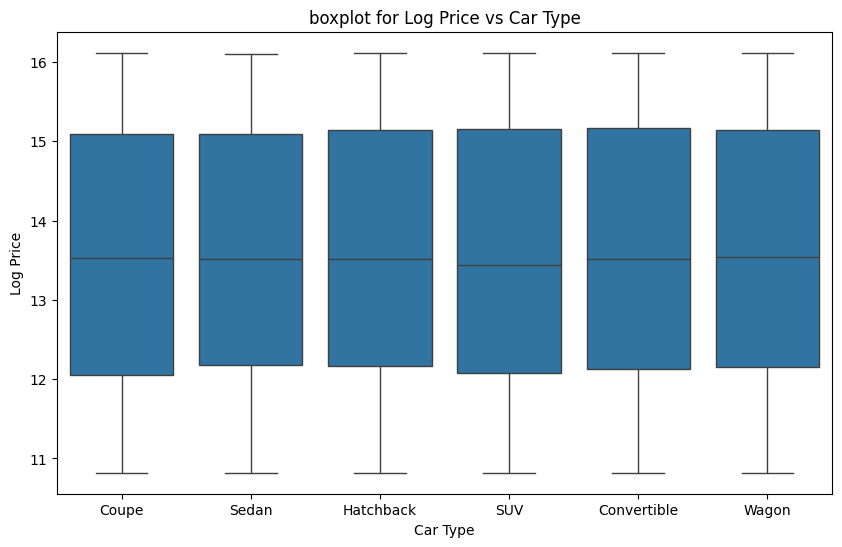

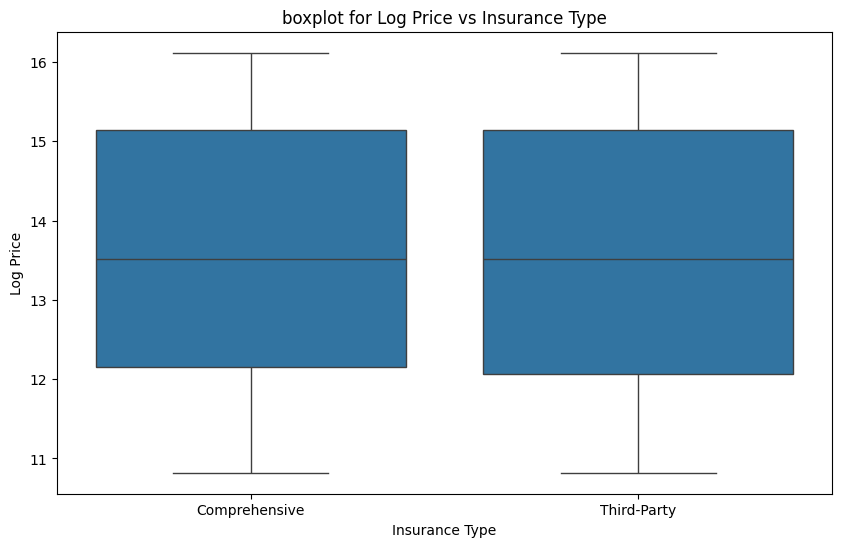

In [90]:
for col in categorical_cols:
  plt.figure(figsize=(10,6))
  plt.title(f"boxplot for Log Price vs {col}")
  sns.boxplot(x=col,y="Log Price",data=df)
  plt.show()

**boxplot for Logprice**

checking outliers in log price(target)

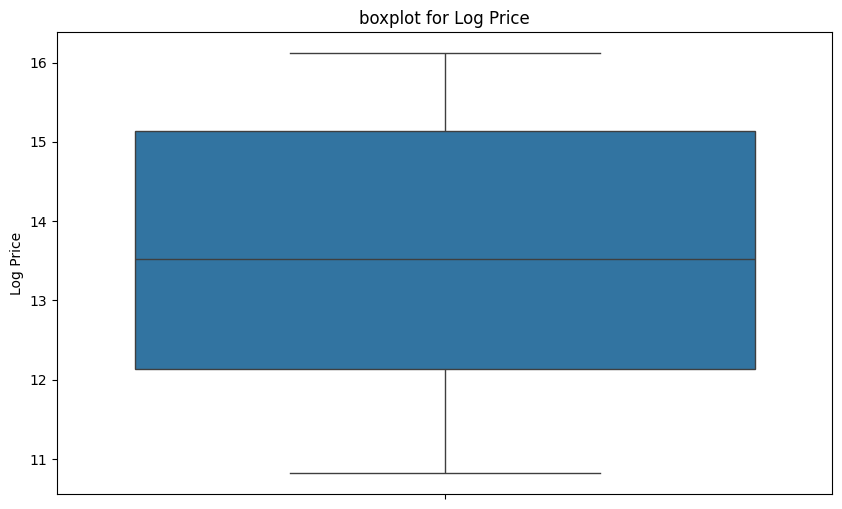

In [91]:
plt.figure(figsize=(10,6))
plt.title("boxplot for Log Price")
sns.boxplot(df["Log Price"])
plt.show()

from above,(Log price vs model) and (Log price vs Brand) has some outilers

we have 2 options here

1.removing outilers

2.use robust model ,if we keep outilers

**correlation**

checking ,how the variables(individua) correlated with other varibales(individual)

it applies for numerical columns only.

**one-hot encoding**

In [92]:
df.select_dtypes(include=["object","bool"]).columns

Index(['Brand', 'Model', 'Fuel Type', 'Transmission Type', 'Color',
       'Number of Owners', 'Service History', 'Location', 'Previous Accidents',
       'Car Type', 'Insurance Type'],
      dtype='object')

In [93]:
df_encoded=pd.get_dummies(df,columns=['Brand', 'Model', 'Fuel Type', 'Transmission Type', 'Color',
       'Number of Owners', 'Service History', 'Location', 'Previous Accidents',
       'Car Type', 'Insurance Type'],drop_first=True) #droping the first category to avoid colinearity

In [94]:
df_encoded.head()

,Year,Odometer Reading (km),Engine Capacity (L),Price (INR),Log Price,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Maruti Suzuki,...,Location_Kolkata,Location_Mumbai,Location_Pune,Previous Accidents_Yes,Car Type_Coupe,Car Type_Hatchback,Car Type_SUV,Car Type_Sedan,Car Type_Wagon,Insurance Type_Third-Party
0,2007,53266,4.3,462010.10,13.043344,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,2005,126939,4.9,180959.15,12.106032,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
2,2011,176820,2.8,9293477.00,16.044823,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3,2003,106196,1.1,50000.00,10.819798,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False
4,2024,189674,2.2,700000.00,13.458837,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False


In [95]:
df_encoded.select_dtypes(include="bool").astype(int)

,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Maruti Suzuki,Brand_Mercedes,Brand_Nissan,Brand_Tata,Brand_Toyota,Model_A4,...,Location_Kolkata,Location_Mumbai,Location_Pune,Previous Accidents_Yes,Car Type_Coupe,Car Type_Hatchback,Car Type_SUV,Car Type_Sedan,Car Type_Wagon,Insurance Type_Third-Party
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [96]:
df_encoded[df_encoded.select_dtypes(include="bool").columns]=df_encoded.select_dtypes(include="bool").astype(int)

In [97]:
df_encoded.head()

,Year,Odometer Reading (km),Engine Capacity (L),Price (INR),Log Price,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Maruti Suzuki,...,Location_Kolkata,Location_Mumbai,Location_Pune,Previous Accidents_Yes,Car Type_Coupe,Car Type_Hatchback,Car Type_SUV,Car Type_Sedan,Car Type_Wagon,Insurance Type_Third-Party
0,2007,53266,4.3,462010.10,13.043344,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2005,126939,4.9,180959.15,12.106032,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,2011,176820,2.8,9293477.00,16.044823,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,2003,106196,1.1,50000.00,10.819798,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,2024,189674,2.2,700000.00,13.458837,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


**correlation**

In [98]:
corr=df_encoded.corr()
corr

,Year,Odometer Reading (km),Engine Capacity (L),Price (INR),Log Price,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Maruti Suzuki,...,Location_Kolkata,Location_Mumbai,Location_Pune,Previous Accidents_Yes,Car Type_Coupe,Car Type_Hatchback,Car Type_SUV,Car Type_Sedan,Car Type_Wagon,Insurance Type_Third-Party
Year,1.000000,-0.008857,-0.000880,0.130871,0.341922,0.010020,0.002458,-0.022317,-0.004876,-0.012468,...,0.008980,-0.006911,-0.000260,-0.013382,0.005768,0.004352,-0.007359,0.000383,0.003249,-0.004425
Odometer Reading (km),-0.008857,1.000000,-0.001322,-0.015004,-0.024894,0.003987,0.009935,0.001011,0.022938,0.004471,...,-0.001762,-0.000214,0.001990,-0.023200,0.015929,0.012339,0.002104,-0.012499,0.009386,-0.006775
Engine Capacity (L),-0.000880,-0.001322,1.000000,-0.010109,-0.008781,0.000059,-0.010147,-0.003363,0.021046,-0.006305,...,-0.004235,-0.014961,0.013310,-0.009227,-0.014399,0.001231,0.015412,0.008361,0.004728,-0.013888
Price (INR),0.130871,-0.015004,-0.010109,1.000000,0.842039,0.486440,-0.157455,-0.236885,-0.191475,-0.254262,...,-0.019201,0.014091,0.004467,-0.003040,-0.009836,0.006961,0.005122,-0.003748,-0.002924,-0.003507
Log Price,0.341922,-0.024894,-0.008781,0.842039,1.000000,0.399352,-0.145506,-0.284901,-0.091399,-0.347926,...,-0.010040,0.020627,0.002746,-0.014457,-0.006180,0.004549,-0.001631,0.000475,0.001861,-0.006045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Car Type_Hatchback,0.004352,0.012339,0.001231,0.006961,0.004549,0.004070,-0.003484,-0.017483,-0.002899,-0.000045,...,0.000586,0.003668,-0.006257,-0.003899,-0.196960,1.000000,-0.198106,-0.199964,-0.203735,-0.005980
Car Type_SUV,-0.007359,0.002104,0.015412,0.005122,-0.001631,-0.006679,0.011480,-0.007588,-0.004769,-0.000175,...,0.011512,-0.007205,0.004198,-0.009513,-0.197746,-0.198106,1.000000,-0.200763,-0.204549,-0.002348
Car Type_Sedan,0.000383,-0.012499,0.008361,-0.003748,0.000475,0.016522,0.012585,0.026921,0.019136,-0.017399,...,-0.006407,-0.001719,0.005688,0.003953,-0.199601,-0.199964,-0.200763,1.000000,-0.206467,0.000132
Car Type_Wagon,0.003249,0.009386,0.004728,-0.002924,0.001861,-0.004924,-0.005347,0.002486,0.008077,-0.001249,...,0.011989,0.012936,0.002045,-0.001540,-0.203365,-0.203735,-0.204549,-0.206467,1.000000,0.009293


**heatmap**

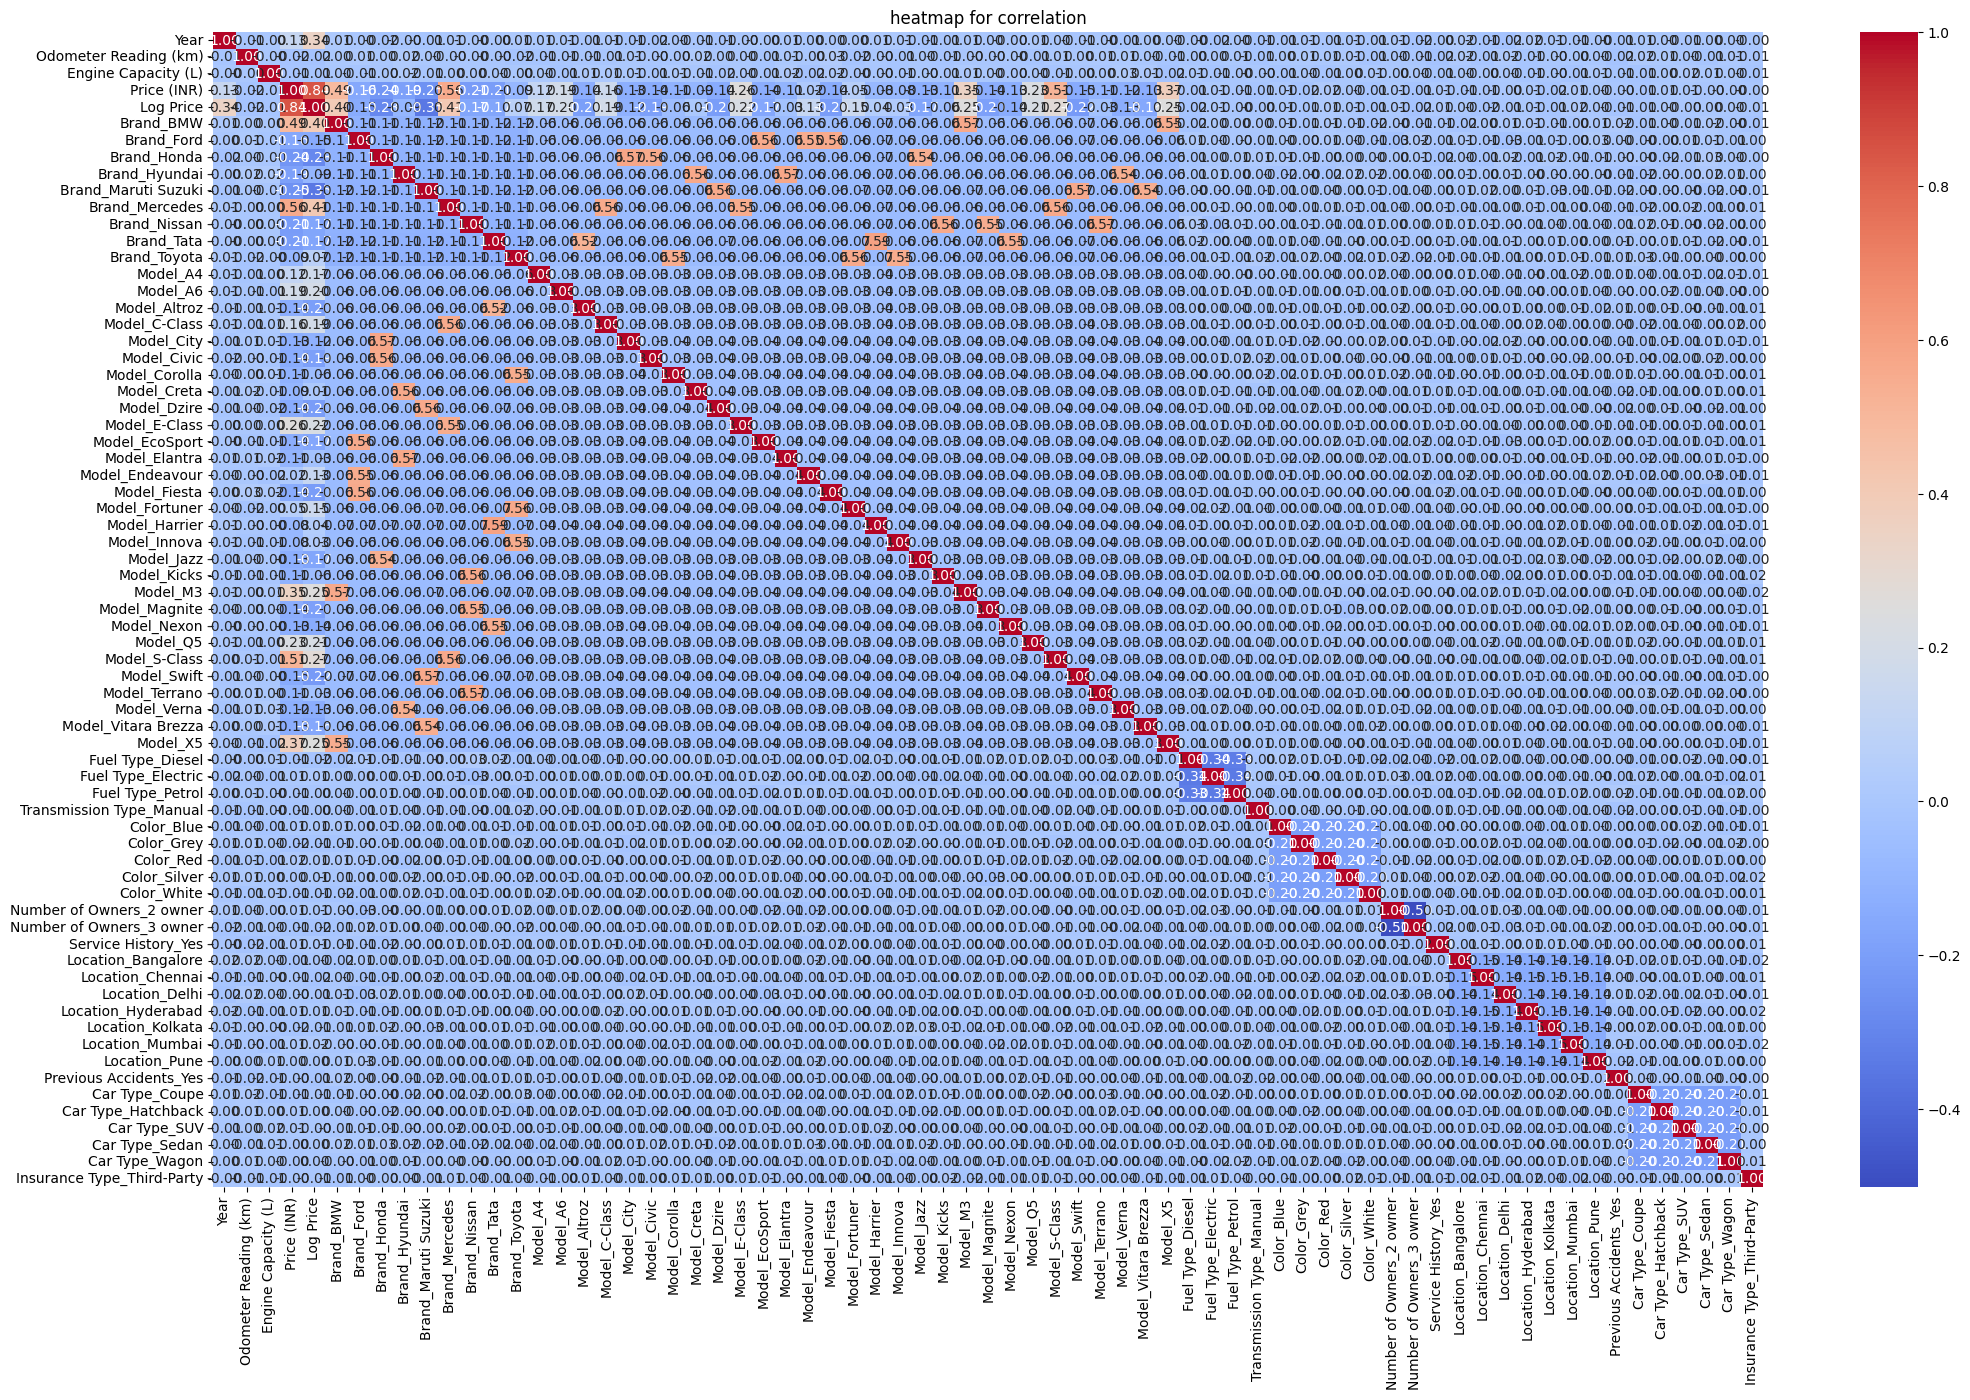

In [99]:
plt.figure(figsize=(25,15))
plt.title("heatmap for correlation")
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

#model

**spliting the features and targets**

In [100]:
X=df_encoded.drop(["Log Price","Price (INR)"],axis=1)
y=df_encoded["Log Price"]


In [101]:
X

,Year,Odometer Reading (km),Engine Capacity (L),Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Maruti Suzuki,Brand_Mercedes,Brand_Nissan,...,Location_Kolkata,Location_Mumbai,Location_Pune,Previous Accidents_Yes,Car Type_Coupe,Car Type_Hatchback,Car Type_SUV,Car Type_Sedan,Car Type_Wagon,Insurance Type_Third-Party
0,2007,53266,4.3,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2005,126939,4.9,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,2011,176820,2.8,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,2003,106196,1.1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,2024,189674,2.2,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2001,183698,1.4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
9996,2003,97699,3.7,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9997,2022,26727,2.3,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9998,2020,134439,1.2,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [102]:
y

,Log Price
0,13.043344
1,12.106032
2,16.044823
3,10.819798
4,13.458837
...,...
9995,10.819798
9996,10.819798
9997,15.162542
9998,14.819752


**Train-test_split**

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [104]:
X_train

,Year,Odometer Reading (km),Engine Capacity (L),Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Maruti Suzuki,Brand_Mercedes,Brand_Nissan,...,Location_Kolkata,Location_Mumbai,Location_Pune,Previous Accidents_Yes,Car Type_Coupe,Car Type_Hatchback,Car Type_SUV,Car Type_Sedan,Car Type_Wagon,Insurance Type_Third-Party
9254,2021,153535,4.9,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1561,2023,109055,1.5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1670,2003,143747,1.2,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
6087,2009,93113,1.6,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6669,2024,191166,2.1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2015,174814,1.7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5191,2006,127534,1.1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5390,2007,190517,3.3,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
860,2005,188304,1.6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [105]:
X_test

,Year,Odometer Reading (km),Engine Capacity (L),Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Maruti Suzuki,Brand_Mercedes,Brand_Nissan,...,Location_Kolkata,Location_Mumbai,Location_Pune,Previous Accidents_Yes,Car Type_Coupe,Car Type_Hatchback,Car Type_SUV,Car Type_Sedan,Car Type_Wagon,Insurance Type_Third-Party
6252,2002,67395,2.8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4684,2007,9154,1.2,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1731,2006,30807,2.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4742,2017,87175,4.4,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4521,2007,16466,1.9,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,2022,77369,1.8,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
8285,2021,28413,1.4,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7853,2004,82943,4.9,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1095,2022,199335,2.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [106]:
y_train

,Log Price
9254,16.102674
1561,15.049132
1670,14.862282
6087,10.819798
6669,14.220976
...,...
5734,11.876032
5191,10.819798
5390,10.819798
860,15.757378


In [107]:
y_test

,Log Price
6252,14.478143
4684,13.057564
1731,15.777769
4742,12.025298
4521,10.819798
...,...
6412,13.098881
8285,15.655384
7853,13.194795
1095,14.166238


**Model selection**

In [108]:
#installing the xgboost and lightgbm
!pip install xgboost
!pip install lightgbm

In [109]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

def train_and_evaluate_models(X_train, y_train):
    models = {
        'RandomForest': RandomForestRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42, verbosity=0),
        'GradientBoosting': GradientBoostingRegressor(random_state=42),
        'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
        'LightGBM': LGBMRegressor(random_state=42)
    }

    param_grids = {
        'RandomForest': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        },
        'XGBoost': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6, 10],
            'learning_rate': [0.05, 0.1]
        },
        'GradientBoosting': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5],
            'learning_rate': [0.05, 0.1]
        },
        'HistGradientBoosting': {
            'max_iter': [100, 200],
            'max_depth': [None, 10],
            'learning_rate': [0.05, 0.1]
        },
        'LightGBM': {
            'n_estimators': [100, 200],
            'max_depth': [-1, 10, 20],
            'learning_rate': [0.05, 0.1]
        }
    }

    results = []

    for name, model in models.items():
        print(f"Training {name}...")

        grid = GridSearchCV(
            model,
            param_grids[name],
            cv=3,
            n_jobs=-1,
            scoring='r2',
            verbose=1
        )

        grid.fit(X_train, y_train)
        best_score = grid.best_score_
        best_params = grid.best_params_

        print(f"{name} Best R² Score: {best_score:.4f}")
        print(f"{name} Best Params: {best_params}")
        print('-' * 50)

        results.append({
            'Model': name,
            'Best_R2_Score': best_score,
            'Best_Params': best_params
        })

    results_df = pd.DataFrame(results)
    return results_df


In [110]:
results_df=train_and_evaluate_models(X_train,y_train)
print(results_df)

Training RandomForest...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
RandomForest Best R² Score: 0.9967
RandomForest Best Params: {'max_depth': None, 'n_estimators': 100}
--------------------------------------------------
Training XGBoost...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
XGBoost Best R² Score: 0.9977
XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
--------------------------------------------------
Training GradientBoosting...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
GradientBoosting Best R² Score: 0.9966
GradientBoosting Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
--------------------------------------------------
Training HistGradientBoosting...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
HistGradientBoosting Best R² Score: 0.9976
HistGradientBoosting Best Params: {'learning_rate': 0.1, 'max_depth': 10, 'max_iter': 200}
----------------------

In [111]:
results_df

,Model,Best_R2_Score,Best_Params
0,RandomForest,0.996720,"{'max_depth': None, 'n_estimators': 100}"
1,XGBoost,0.997679,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
2,GradientBoosting,0.996575,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
3,HistGradientBoosting,0.997591,"{'learning_rate': 0.1, 'max_depth': 10, 'max_i..."
4,LightGBM,0.997608,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."


In [112]:
results_df.iloc[1]

,1
Model,XGBoost
Best_R2_Score,0.997679
Best_Params,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."


**Bar plot for model comparision**

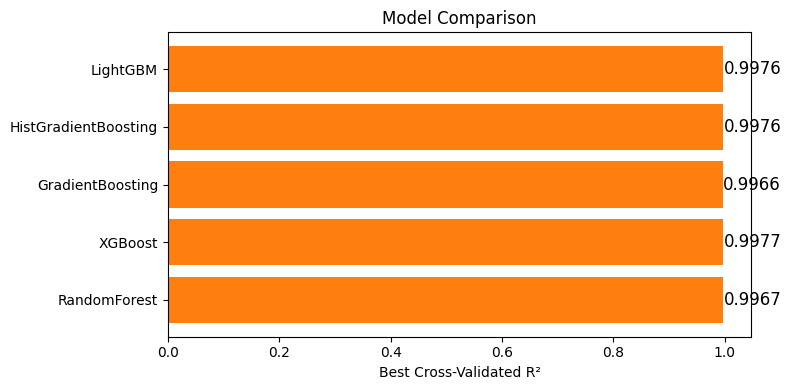

In [113]:
plt.figure(figsize=(8,4))
plt.title("Model Comparison")
plt.barh(results_df['Model'], results_df['Best_R2_Score'])
bars = plt.barh(results_df['Model'], results_df['Best_R2_Score'])

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height() / 2,
             f'{width:.4f}', va='center', ha='left', fontsize=12)

plt.xlabel("Best Cross‐Validated R²")

plt.tight_layout()
plt.show()

#polynimal regression

In [114]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)


from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train_poly,y_train)

#evalution
y_pred_poly=model.predict(X_test_poly)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#ON TRAINED DATA
mse=mean_squared_error(y_train,model.predict(X_train_poly))
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train,model.predict(X_train_poly))
r2=r2_score(y_train,model.predict(X_train_poly))


print("on trained data")
print("MSE:",mse)
print("RMSE:",rmse)
print("MAE:",mae)
print("R2:",r2)
print("-"*50)

#ON TESTED DATA
mse=mean_squared_error(y_test,y_pred_poly)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred_poly)
r2=r2_score(y_test,y_pred_poly)


print("on tested data")
print("MSE:",mse)
print("RMSE:",rmse)
print("MAE:",mae)
print("R2:",r2)

on trained data
MSE: 0.19529202950799238
RMSE: 0.44191857791678363
MAE: 0.3597337574604817
R2: 0.9360375498723279
--------------------------------------------------
on tested data
MSE: 0.2720284368077542
RMSE: 0.5215634542486218
MAE: 0.4229208366230526
R2: 0.9140838853462129


**Model Training**

In [115]:
from xgboost import XGBRegressor

#creating the object for the model
final_model = XGBRegressor(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    random_state=42,
    verbosity=0
)

#traing the model
final_model.fit(X_train,y_train)





XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [116]:
#model predictions

#model predictions on trained data
y_pred_train=final_model.predict(X_train)


#model predictions on test data (unseen data)
y_pred_test=final_model.predict(X_test)

In [117]:
y_pred_train

array([16.101507, 15.047115, 14.863996, ..., 10.81989 , 15.75789 ,
       13.407823], dtype=float32)

In [118]:
#applying the inverse log transform-->to get prices in INR
y_pred_train=np.round(np.expm1(y_pred_train)).astype(int)
y_pred_test=np.round(np.expm1(y_pred_test)).astype(int)

y_actual_test=np.round(np.expm1(y_test)).astype(int)
y_actual_train=np.round(np.expm1(y_train)).astype(int)

**Model Evalution**

In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(y_actual,y_pred,data_type):
  mae = mean_absolute_error(y_actual, y_pred)
  mse = mean_squared_error(y_actual, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_actual, y_pred)

  print(f"----- {data_type} Set Evaluation -----")
  print(f"MAE: ₹{mae:,.2f}")
  print(f"MSE: ₹{mse:,.2f}")
  print(f"RMSE: ₹{rmse:,.2f}")
  print(f"R² Score: {r2:.4f}")
  print("-" * 40)

In [120]:
evaluate_model(y_actual_train,y_pred_train,'train')

----- train Set Evaluation -----
MAE: ₹5,284.00
MSE: ₹105,605,114.56
RMSE: ₹10,276.43
R² Score: 1.0000
----------------------------------------


In [121]:
evaluate_model(y_actual_test,y_pred_test,'test')

----- test Set Evaluation -----
MAE: ₹19,885.44
MSE: ₹1,067,698,709.55
RMSE: ₹32,675.66
R² Score: 0.9998
----------------------------------------


**Regression plots(Actual vs predicted)**

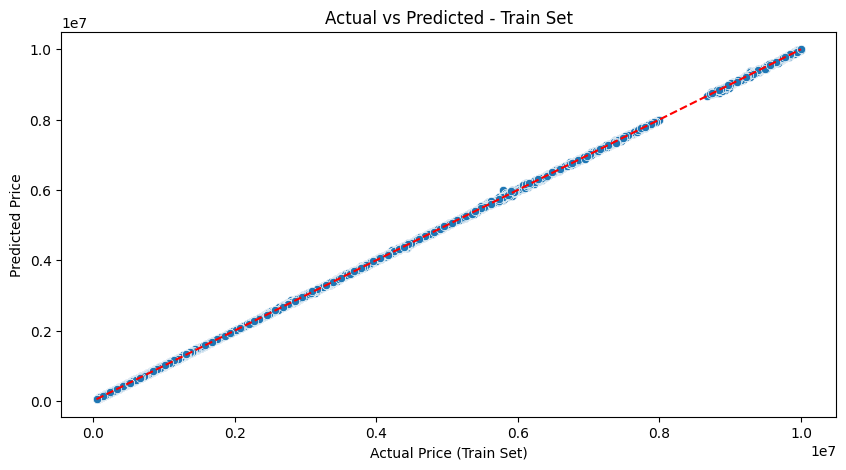

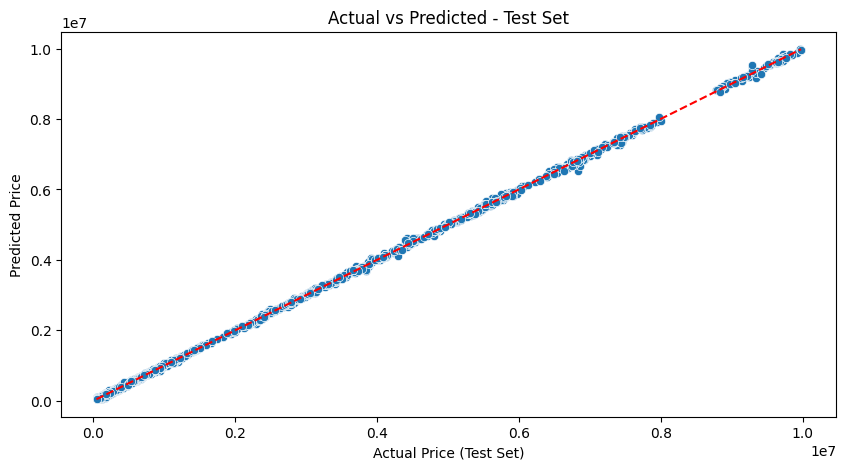

In [122]:
# 1. Ploting for Train Set
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_actual_train, y=y_pred_train)
plt.plot([y_actual_train.min(), y_actual_train.max()], [y_pred_train.min(), y_pred_train.max()], color='red', linestyle='--')
plt.xlabel('Actual Price (Train Set)')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted - Train Set')
plt.show()

# 2. Ploting for Test Set
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_actual_test, y=y_pred_test)
plt.plot([y_actual_test.min(), y_actual_test.max()], [y_pred_test.min(), y_pred_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price (Test Set)')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted - Test Set')
plt.show()


**Residual Plots**

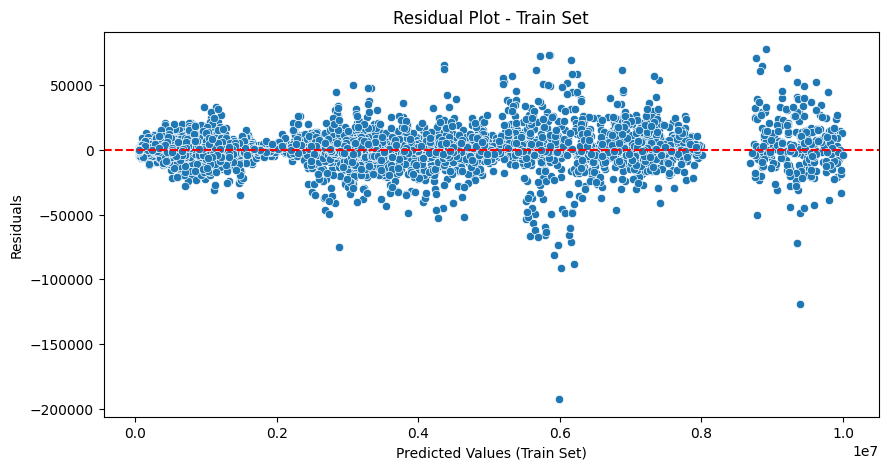

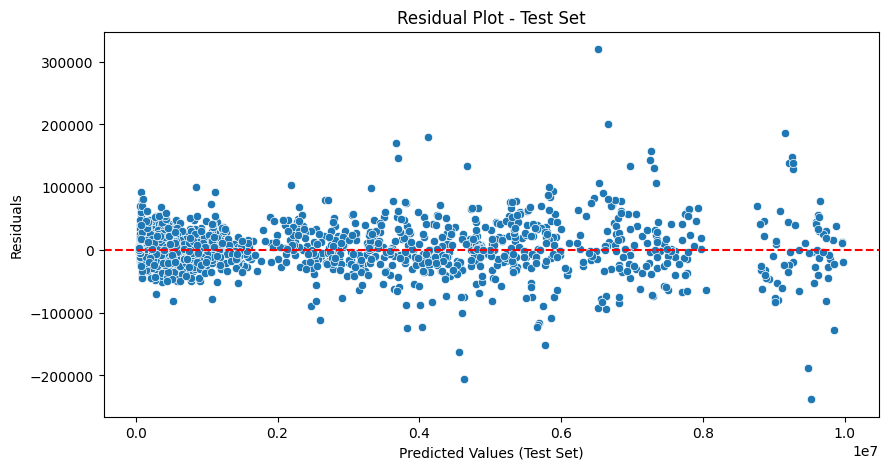

In [123]:
# 1. Calculating residuals
train_residuals = y_actual_train - y_pred_train
test_residuals = y_actual_test - y_pred_test

# 2.residuals plot  for Train Set
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_train, y=train_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Train Set)')
plt.ylabel('Residuals')
plt.title('Residual Plot - Train Set')
plt.show()

# 3.residuals plot for Test Set
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_test, y=test_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Test Set)')
plt.ylabel('Residuals')
plt.title('Residual Plot - Test Set')
plt.show()


**Saving the model**

In [124]:
import joblib
joblib.dump(final_model,'final_xgboost_model.pkl')

['final_xgboost_model.pkl']